# Regularización y variabilidad

Esta es la solución a la tarea 4 referente a la [sección 5](https://felipegonzalez.github.io/aprendizaje-maquina-mcd-2022/05-regularizacion-1.html) de la notas

En este ejemplo hacemos **análisis de sentimiento**, intentanto predecir si reseñas de películas son positivas o negativas a partir del texto de las reseñas. En este ejemplo veremos un enfoque relativamente simple, que consiste en considerar solamente las palabras que contienen las reseñas, sin tomar en cuenta el orden (el modelo de bolsa de palabras o **bag of words**).

Usaremos regresión lineal, aunque este tipo de problema es mejor resolverlo usando algún método para variables binarias o categóricas (regresión logística por ejemplo)

## Feature Engineering Básico

Hay muchas maneras de preprocesar los datos para obtener variables numéricas a partir del texto. En este caso simplemente tomamos las palabras que ocurren más frecuentemente. 
* Encontramos las 3000 palabras más frecuentes sobre todos los textos, por ejemplo. Estas palabras son nuestro **vocabulario**.
* Registramos en qué documentos ocurre cada una de esas palabras.
* Cada palabra es una columna de nuestros datos, el valor es 1 si la palabra ocurre en documento y 0 si no ocurre.


Por ejemplo, para el texto "Un gato blanco, un gato negro", "un perro juega", "un astronauta juega" quedarían los datos:
|texto_id | un | gato | negro | blanco | perro | juega |
-----|------|-------|--------|-------|-------  | ---- |
| texto_1 | 1  |  1   |   1   |   1    |  0    | 0     |
| texto_2 | 1  |  0   |  0    | 0      |  1    |  1  |
| texto_3 | 1  |  0   |  0    | 0      |  0    |  1   |

Nótese que la palabra **astronauta** no está en nuestro vocabulario para este ejemplo.

Hay varias opciones para tener mejores variables, que pueden o no ayudar en este problema (no las exploramos en este ejercicio):
* Usar conteos de frecuencias de ocurrencia de palabras en cada documento, o usar log(1+ conteo), en lugar de 0-1's
* Usar palabras frecuentes, pero quitar las que son **stopwords**, como son preposiciones y artículos entre otras, pues no tienen significado: en inglés, por ejemplo, **so, is, then, the, a**, etc.
* Lematizar palabras: por ejemplo, contar en la misma categoría **movie** y **movies**, o **funny** y **funniest**, etc.
* Usar indicadores binarios si la palabra ocurre o no en lugar de la frecuencia
* Usar frecuencias ponderadas por qué tan rara es una palabra sobre todos los documentos (frecuencia inversa sobre documentos)
* Usar pares de palabras en lugar de palabras sueltas: por ejemplo: juntar "not" con la palabra que sigue (en lugar de usar **not** y **bad** por separado, juntar en una palabra **not_bad**),
* Usar técnicas de reducción de dimensionalidad que considera la co-ocurrencia de palabras (veremos más adelante en el curso).
* Muchas otras

## Clasificador de textos
Ahora hacemos regresión lineal con regularización ridge/lasso (aunque este es un problema que podríamos tratar mejor con regresión logística). La penalización es de la forma

$$\lambda((1-\alpha) \sum_j \beta_j^2 + \alpha \sum_j |\beta_j|)$$

de manera que combina ventajas de ridge (encoger juntos parámetros de variables correlacionadas) y lasso (eliminar variables que aportan poco a la predicción).

**Pregunta 1**: ¿Qué modelo se desempeña mejor? ¿Cuál está más sobreajustado? ¿Qué cosas podrías considerar para reducir el sesgo (piensa qué nuevas entradas podrías construir)?
<br>Se desempeña mejor el modelo con `mayor regularización`, lo cual es indicativo de un modelo más rígido comparado con el de menor regularización. Esto quiere decir que el modelo con baja regularización está más sobreajustado a los datos. Para reducir el sesgo se podría pensar en otro tipo de modelo que no necesariamente sea una regresión lineal.
* Baja regularización: $RMSE=0.4430$
* Mayor regularización: $RMSE=0.3961$

**Pregunta 2**: Obtén los coeficientes de los dos modelos que comparaste arriba. Compara los
coeficientes más negativos y más positivos de cada modelo. ¿Cuáles tienen
valores más grandes en valor absoluto? ¿Por qué? ¿Tiene sentido cuáles palabras
tienen coeficiente positivo y cuáles negativo?


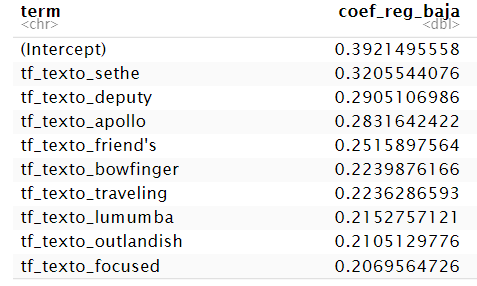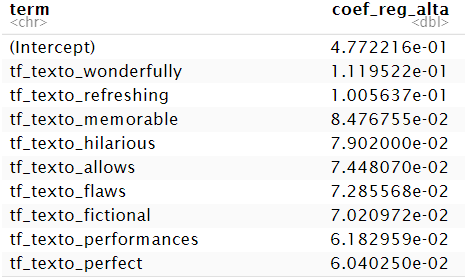